# **PROJECT : Gold Price Prediction**

**Import required libraries**

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from sklearn.model_selection import GridSearchCV
df=pd.read_csv('/content/gld_price_data.csv')
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [48]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [49]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


**Statistical measures of the dataset**

In [50]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


**Checking missing values**

In [52]:
df.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [53]:
df.dtypes

Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object

**Display Correlation of data**

In [54]:
corr=df.corr()

<Axes: >

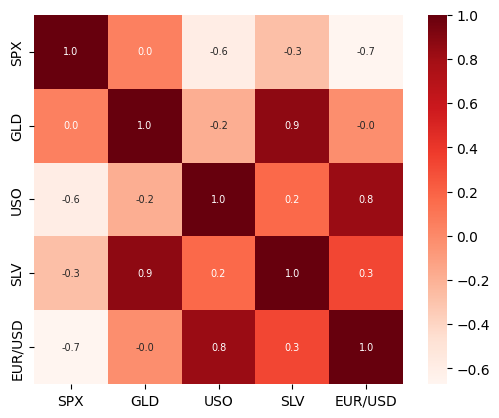

In [55]:
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':7},cmap='Reds')

**Distribution of the GLD price**

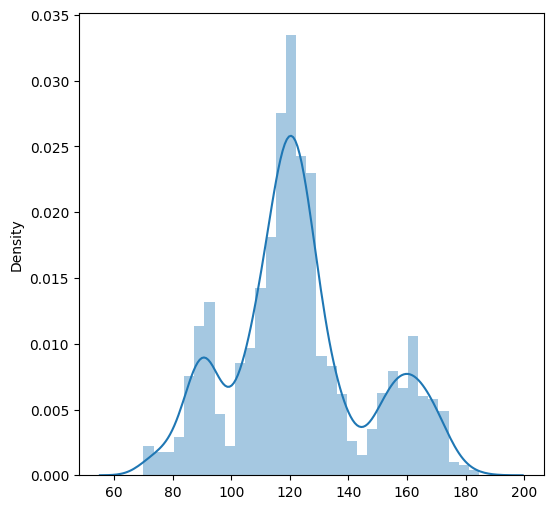

In [56]:
plt.figure(figsize=(6,6))
sns.distplot(x=df.GLD)
plt.show()

**Separating the Input features and target**

In [57]:
x=df.drop(['Date','EUR/USD'],axis=1)
x

,SPX,GLD,USO,SLV
0,1447.160034,84.860001,78.470001,15.1800
1,1447.160034,85.570000,78.370003,15.2850
2,1411.630005,85.129997,77.309998,15.1670
3,1416.180054,84.769997,75.500000,15.0530
4,1390.189941,86.779999,76.059998,15.5900
...,...,...,...,...
2285,2671.919922,124.589996,14.060000,15.5100
2286,2697.790039,124.330002,14.370000,15.5300
2287,2723.070068,125.180000,14.410000,15.7400
2288,2730.129883,124.489998,14.380000,15.5600


In [58]:
y=df['EUR/USD']
y

0       1.471692
1       1.474491
2       1.475492
3       1.468299
4       1.557099
          ...   
2285    1.186789
2286    1.184722
2287    1.191753
2288    1.193118
2289    1.182033
Name: EUR/USD, Length: 2290, dtype: float64

**Feature selection using Spearman's **

In [59]:
correlation_matrix=x.corrwith(y)
correlation_matrix

SPX   -0.672017
GLD   -0.024375
USO    0.829317
SLV    0.321631
dtype: float64

In [60]:
selected_features=correlation_matrix.abs().sort_values(ascending=False).index
selected_features

Index(['USO', 'SPX', 'SLV', 'GLD'], dtype='object')

In [61]:
x1=x[selected_features]
x1

,USO,SPX,SLV,GLD
0,78.470001,1447.160034,15.1800,84.860001
1,78.370003,1447.160034,15.2850,85.570000
2,77.309998,1411.630005,15.1670,85.129997
3,75.500000,1416.180054,15.0530,84.769997
4,76.059998,1390.189941,15.5900,86.779999
...,...,...,...,...
2285,14.060000,2671.919922,15.5100,124.589996
2286,14.370000,2697.790039,15.5300,124.330002
2287,14.410000,2723.070068,15.7400,125.180000
2288,14.380000,2730.129883,15.5600,124.489998


<Axes: xlabel='SPX', ylabel='EUR/USD'>

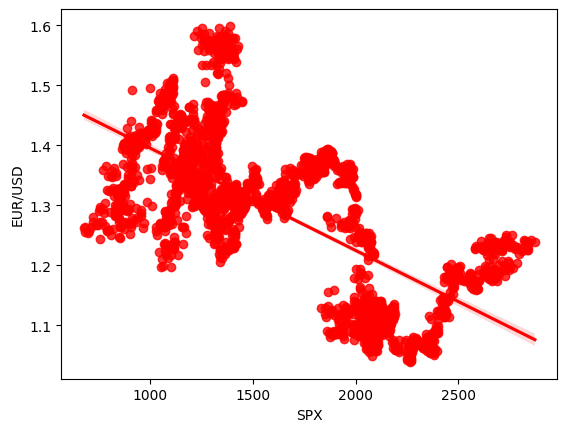

In [62]:
sns.regplot(x=df['SPX'],y=y,color='red')

<Axes: xlabel='GLD', ylabel='EUR/USD'>

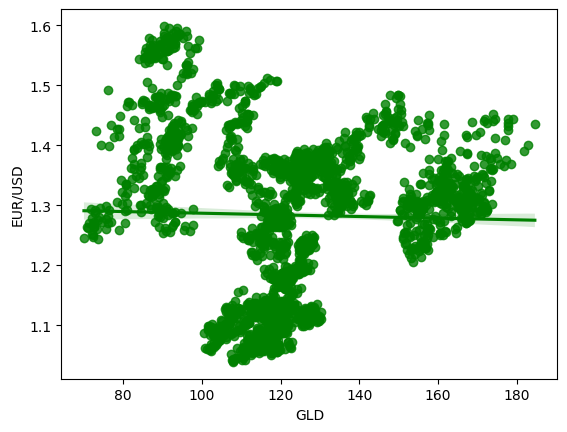

In [63]:
sns.regplot(x=df['GLD'],y=y,color='green')

<Axes: xlabel='USO', ylabel='EUR/USD'>

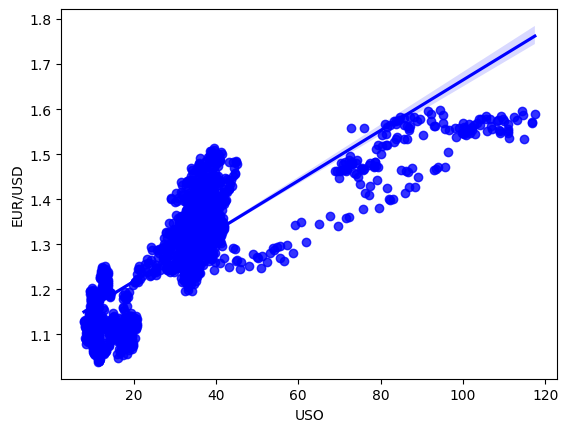

In [64]:
sns.regplot(x=df['USO'],y=y,color='blue')

<Axes: xlabel='SLV', ylabel='EUR/USD'>

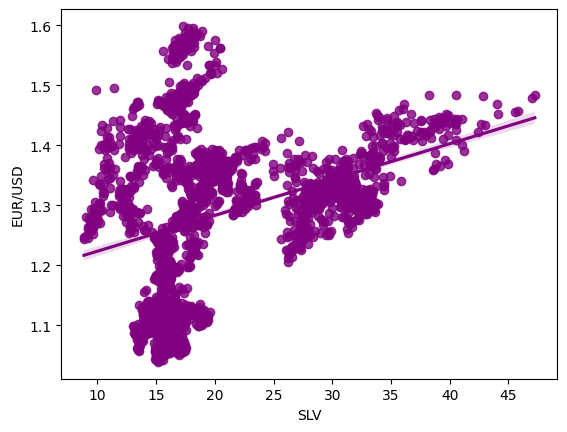

In [65]:
sns.regplot(x=df['SLV'],y=y,color='purple')

**Training & Testing data**

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.30,random_state=42)
x_train

,USO,SPX,SLV,GLD
1572,19.260000,2099.679932,15.750000,116.339996
1467,34.700001,2001.540039,18.260000,120.730003
1574,18.650000,2110.300049,15.540000,115.279999
567,34.740002,1089.469971,17.530001,117.339996
1292,33.820000,1802.479980,19.270000,120.459999
...,...,...,...,...
1638,19.660000,2095.840088,15.480000,112.839996
1095,33.369999,1426.189941,29.370001,162.020004
1130,33.430000,1502.420044,27.730000,152.619995
1294,33.189999,1807.229980,18.959999,119.459999


In [67]:
x_test
y_train
y_test

2178    1.185396
1271    1.380396
1268    1.367596
44      1.538509
2025    1.053585
          ...   
993     1.225640
2175    1.173186
1057    1.294834
1064    1.270971
261     1.366195
Name: EUR/USD, Length: 687, dtype: float64

**Model Creation**
- LinearRegression
- RandomForestRegressor

**LinearRegression**

**Hyperparameter tuning**

In [68]:
from sklearn.linear_model import LinearRegression
lg_model=LinearRegression()
lg_model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [69]:
import warnings
warnings.filterwarnings('ignore')

In [70]:
parameter={'copy_X':[True,False],'fit_intercept':[True,False],'n_jobs':[None,1,5,7,6],'positive':[True,False]}
gsv=GridSearchCV(lg_model,parameter,cv=10,scoring='accuracy')
gsv.fit(x_train,y_train)
print(gsv.best_params_)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': True}


**Model creation**

In [71]:
lg_model1=LinearRegression(positive=True)
lg_model1.fit(x_train,y_train)
y_pred=lg_model1.predict(x_test)
y_pred

array([1.16160328, 1.30618736, 1.30953619, 1.55929268, 1.16096634,
       1.19632914, 1.16617842, 1.16285644, 1.16844791, 1.28726822,
       1.21335431, 1.33767506, 1.34021241, 1.27469397, 1.33800327,
       1.27934522, 1.31643796, 1.15620279, 1.16113704, 1.31406684,
       1.30328636, 1.19948488, 1.28853604, 1.29940132, 1.15818069,
       1.16254868, 1.1681712 , 1.20842558, 1.31622373, 1.30763924,
       1.44524809, 1.49649032, 1.3630964 , 1.15988453, 1.13801651,
       1.15302704, 1.3029218 , 1.33583876, 1.35906053, 1.31356919,
       1.16103569, 1.15715194, 1.1594625 , 1.20552075, 1.15438712,
       1.17152852, 1.23554886, 1.19683962, 1.3084608 , 1.15056404,
       1.29834857, 1.3077541 , 1.29523241, 1.35992915, 1.32753884,
       1.29680046, 1.37290113, 1.30780052, 1.29509443, 1.15369975,
       1.31778336, 1.69097688, 1.16718495, 1.15218857, 1.25678645,
       1.15384131, 1.14500019, 1.2595303 , 1.35972891, 1.22924361,
       1.27943302, 1.32842149, 1.30584052, 1.31764093, 1.35073

**Find errors**

In [72]:
df2=pd.DataFrame({'act_value':y_test,'pred_value':y_pred,'diff':y_test-y_pred})
df2

,act_value,pred_value,diff
2178,1.185396,1.161603,0.023793
1271,1.380396,1.306187,0.074209
1268,1.367596,1.309536,0.058060
44,1.538509,1.559293,-0.020784
2025,1.053585,1.160966,-0.107381
...,...,...,...
993,1.225640,1.303214,-0.077574
2175,1.173186,1.158526,0.014660
1057,1.294834,1.316662,-0.021828
1064,1.270971,1.322329,-0.051358


**Slop and Constant**

In [73]:
print('slope',lg_model1.coef_)
list(zip(x,lg_model1.coef_))

slope [0.00531139 0.         0.00368907 0.        ]


[('SPX', 0.005311394946875845),
 ('GLD', 0.0),
 ('USO', 0.003689066870709507),
 ('SLV', 0.0)]

In [74]:
print('constant',lg_model1.intercept_)

constant 1.0396617404085278


**Performance Evaluation(errors)**

In [75]:
from sklearn.metrics import mean_absolute_percentage_error
print('MAPE',mean_absolute_percentage_error(y_test,y_pred))

MAPE 0.04593014238112004


In [76]:
from sklearn.metrics import r2_score
r1=r2_score(y_test,y_pred)
print('R2_SCORE: ',r1)

R2_SCORE:  0.7094632164387824


**RandomForestRegressor**

In [77]:
from sklearn.ensemble import RandomForestRegressor
rfg=RandomForestRegressor(n_estimators=100,random_state=40)
rfg.fit(x_train,y_train)
y_pred2=rfg.predict(x_test)
y_pred2

array([1.18107623, 1.37541271, 1.36534157, 1.5370532 , 1.05998961,
       1.09280271, 1.21945267, 1.06601614, 1.11795208, 1.39848132,
       1.25352622, 1.30435392, 1.31119813, 1.25680365, 1.2936067 ,
       1.37501224, 1.35863881, 1.04652335, 1.05927477, 1.38480786,
       1.37524353, 1.1177303 , 1.27264213, 1.36406724, 1.11911804,
       1.23569853, 1.20965787, 1.24334107, 1.47937315, 1.33610343,
       1.45581584, 1.47767091, 1.30933409, 1.06656349, 1.1038172 ,
       1.12096404, 1.31129956, 1.34693906, 1.42193291, 1.30874602,
       1.0723279 , 1.06484246, 1.16361087, 1.14930006, 1.17685922,
       1.12060083, 1.30910508, 1.09152487, 1.37183098, 1.1181393 ,
       1.46759773, 1.37156881, 1.40905032, 1.31165585, 1.36258801,
       1.36884754, 1.40606746, 1.35571523, 1.41635917, 1.18954307,
       1.4756521 , 1.51601344, 1.09267814, 1.06197301, 1.38323176,
       1.1801179 , 1.12923175, 1.25790943, 1.34079274, 1.2650192 ,
       1.32198608, 1.31334216, 1.33192962, 1.49338926, 1.31330

**Find errors**

In [78]:
df4=pd.DataFrame({'act_value':y_test,'pred_value':y_pred2,'diff':y_test-y_pred2})
df4

,act_value,pred_value,diff
2178,1.185396,1.181076,0.004320
1271,1.380396,1.375413,0.004983
1268,1.367596,1.365342,0.002254
44,1.538509,1.537053,0.001456
2025,1.053585,1.059990,-0.006405
...,...,...,...
993,1.225640,1.238842,-0.013202
2175,1.173186,1.164814,0.008372
1057,1.294834,1.312390,-0.017556
1064,1.270971,1.273703,-0.002732


**Performance Evaluation(errors)**

In [79]:
from sklearn.metrics import mean_absolute_percentage_error
print('MAPE',mean_absolute_percentage_error(y_test,y_pred2))

MAPE 0.0087249808444416


In [80]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred2)
print('R2_SCORE: ',r2)

R2_SCORE:  0.9807854907178358


<function matplotlib.pyplot.show(close=None, block=None)>

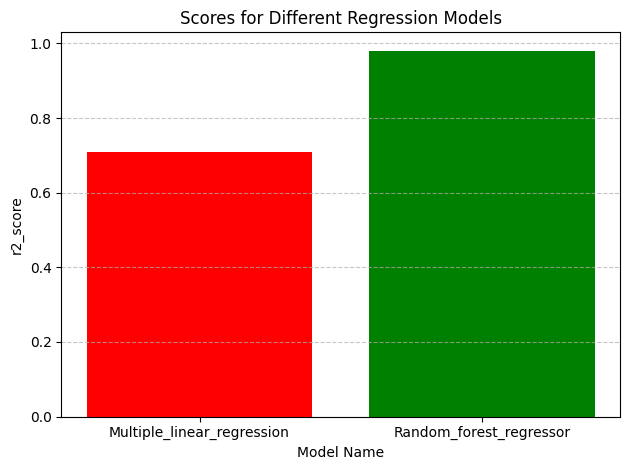

In [81]:
visual=['Multiple_linear_regression','Random_forest_regressor']
result=[r1,r2]
plt.bar(visual,result,color=['red','green'])
plt.xlabel('Model Name')
plt.ylabel('r2_score')
plt.title('Scores for Different Regression Models')
plt.tight_layout() #ensure labels are not cut off
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show